### Fig +/- denaturation step
- Show results of removing the denaturing step on three individual primers

In [1]:
#Imports
import sys
import pandas as pd
import matplotlib.pyplot as plt
import os
import gffutils
import seaborn as sns
import numpy as np
import scipy.stats

sys.path.append('../scripts/')
from plot_helpers import *
import analyze_qpcr_plate

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#Make outdir and load the data
outdir = '../figures/FS3/'
os.makedirs(outdir, exist_ok = True)

In [3]:
#Get the +/- annealing experiment data
qpcr_dir = os.path.join(results_dir, 'qPCR_data')

#annealing test data
anneal_data = ['190828_anneal_test/20190828_161126_CT003077__QPCRBIOSMALQuantificationPlateViewResults.xlsx']
anneal_template  = ['190828_anneal_test/qPCR_analysis_template_rep2_anneal.xlsx']

anneal_df = analyze_qpcr_plate.main(os.path.join(qpcr_dir, anneal_data[0]), os.path.join(qpcr_dir, anneal_template[0]), 'act5c')
samples_to_plot = ['B12_anneal', 'B18_anneal', 'B19_anneal', 'B12_direct', 'B18_direct', 'B19_direct']
anneal_df = anneal_df.loc[pd.IndexSlice[:, :, [*samples_to_plot]],].copy()
anneal_df['percent_remaining'] = anneal_df['fold_change']*100
anneal_df['probe'], anneal_df['experiment'] = zip(*anneal_df.index.get_level_values('sample').map(lambda x: x.split('_')))
anneal_df.replace({'experiment': {'direct': 'no anneal'}}, inplace = True)

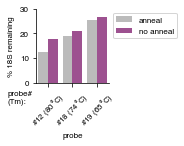

In [4]:
#Plot the depletion +/- the denaturation step
panel_name = 'S3A'
plot = Plotter(corners = [0.16, 0.33, 0.41, 0.62], figsize = (sfig*1.5, sfig))
plot.setup_axis()
plot.ax = sns.barplot(x="probe", y="percent_remaining", hue = 'experiment', data = anneal_df.reset_index(), 
                      ci = 'sd', ax = plot.ax)
plot.set_ylabel('% 18S remaining')
plot.ax.set_xticklabels([r'#12 (80$\degree$C)', '#18 (74$\degree$C)', '#19 (65$\degree$C)'], rotation = 45)
plot.ax.set_ylim(0, 30)
plt.legend(bbox_to_anchor = (1, 1), ncol = 1, fontsize = label_fontsize)
plot.ax.text(0.0, 0.16, 'probe#\n(Tm):', ha = 'left', transform = plot.fig.transFigure, fontsize = label_fontsize)
lines = plot.ax.lines
for line in lines:
    line.set_linewidth(0.75)
    line.set_color('k')
plt.savefig(os.path.join(outdir, '{}.png'.format(panel_name)), dpi = 600)